In [3]:
import sys
sys.path.append("..")

from generation import AnomalyGenerator
from data.data_loader import normalised_subspace, loader, subspace, scaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scienceplots
plt.style.use('science')

In [22]:
# Load and preprocess data

## the following line tells the program to read the csv file with the LSST simulation 
## data and converts it to a pandas dataframe, selects the 5 necessary columns, converts 
## the 5-column dataframe to a numpy array, then normalizes the data in each column so it 
## falls in a range between 0 and 1 for easier processing later. -MEW
X = normalised_subspace()

## This line returns a pandas dataframe with the original (non-normalized) data for 
## the 5 relevant columns -MEW
df = loader()[subspace]

In [23]:
## create an instance of AnomalyGenerator class
anom_gen = AnomalyGenerator()

## predict the labels for the data samples in X using the trained model (? need to understand this part better) -MEW
labels = anom_gen.model.predict(X)

## add labels to the pandas dataframe as a new column -MEW
df["labels"] = labels

## think the scores determined here indicate the confidence that each labelled group represents 
## a real group (if that makes sense -- may be off base on this / need to understand this better) -MEW
df["label_scores"] = anom_gen.model.predict_proba(X).max(axis=1) # Scores of the labels in class - log-likelihood.

Sampling from the GMM

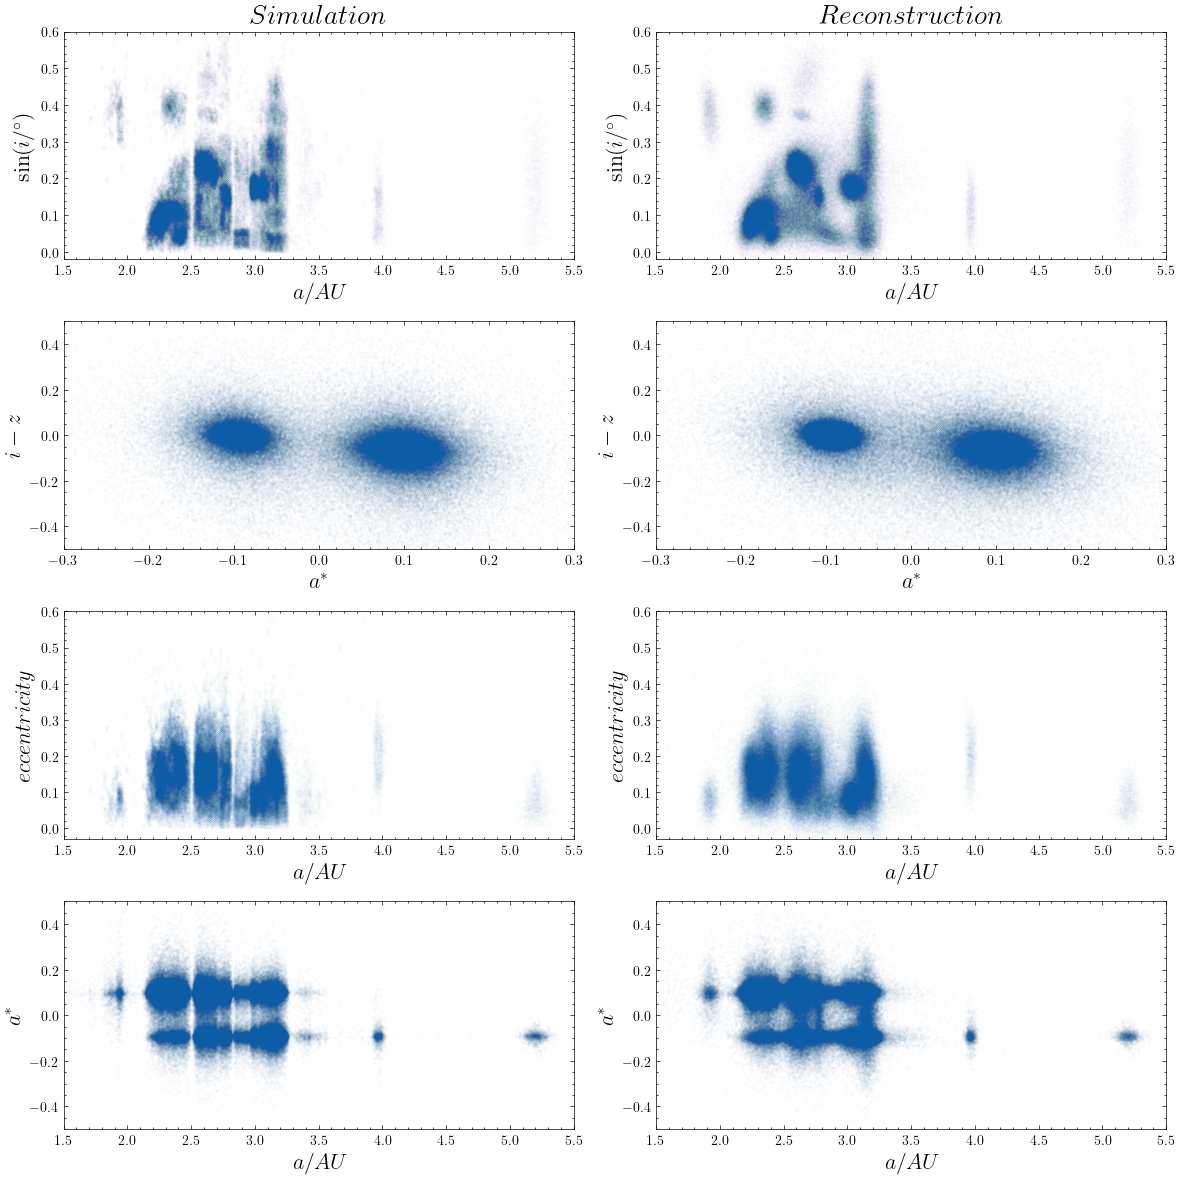

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

#fig.suptitle("Comparison of simulation with the GMM reconstruction.")

## looks like anom_gen.model.sample(len(df))[0] generates samples from the GMM reconstruction
## for each of the 5 columns. Then scaler.inverse_transform transforms the GMM samples
## from the normalized (0..1) space back to the scale of the original simulation data 
## from the CSV file -- is that correct? -MEW
samples = scaler.inverse_transform(anom_gen.model.sample(len(df))[0])

axs[0][0].set_title(r"$Simulation$", fontsize=20)
axs[0][1].set_title(r"$Reconstruction$", fontsize=20)

## plot original "a" values vs "sini" values
## note s determines the size of the markers
## and alpha is transparency - MEW
axs[0][0].scatter(
    df["a"],
    df["sini"],
    s=1e-4,
    alpha=.5,
)

## plot the GMM-generated samples for "a" and "sini" 
## for comparison with the real values - MEW
axs[0][1].scatter(
    samples[:, 2],
    samples[:, 3],
    s=1e-4,
    alpha=.5,
)

## set the x and y labels for the two "a" vs "sini" plots - MEW
axs[0][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[0][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[0][0].set_ylabel(r"$\sin(i / ^\circ)$", fontsize=16)
axs[0][1].set_ylabel(r"$\sin(i / ^\circ)$", fontsize=16)

'''axs[0][0].set_title("Simulation", fontsize=20)
axs[0][1].set_title("GMM reconstruction", fontsize=20)'''

## plot simulation "a*" vs "i-z" - MEW
axs[1][0].scatter(
    df["a*"],
    df["i-z"],
    s=0.001,
    alpha=.5,
)

## plot GMM-generated "a*" vs "i-z" - MEW
axs[1][1].scatter(
    samples[:, 0],
    samples[:, 1],
    s=0.001,
    alpha=.5,
)

## set x and y labels for the "a*" vs "i-z" plots - MEW
axs[1][0].set_xlabel(r"$a^*$", fontsize=16)
axs[1][1].set_xlabel(r"$a^*$", fontsize=16)

axs[1][0].set_ylabel(r"$i - z$", fontsize=16)
axs[1][1].set_ylabel(r"$i - z$", fontsize=16)
'''
axs[1][0].set_title("Simulation")
axs[1][1].set_title("GMM reconstruction")'''

## plot simulation "a" vs "e" - MEW
axs[2][0].scatter(
    df["a"],
    df["e"],
    s=0.001,
    alpha=.25,
)

## plot GMM-generated "a" vs "e" -MEW
axs[2][1].scatter(
    samples[:, 2],
    samples[:, 4],
    s=0.001,
    alpha=.25,
)

## plot simulation "a" vs "a*"
axs[3][0].scatter(
    df["a"],
    df["a*"],
    s=0.001,
    alpha=.5,
)

## plot GMM-generated "a" vs "a*"
axs[3][1].scatter(
    samples[:, 2],
    samples[:, 0],
    s=0.001,
    alpha=.5,
)

## set x and y axis labels for "a" vs "e" plots - MEW
axs[2][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[2][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[2][0].set_ylabel(r"$eccentricity$", fontsize=16)
axs[2][1].set_ylabel(r"$eccentricity$", fontsize=16)



'''
axs[2][0].set_title("Simulation")
axs[2][1].set_title("GMM reconstruction")'''

## set x and y axis labels for "a" vs "a*" plots - MEW
axs[3][0].set_xlabel(r"$a / AU$", fontsize=16)
axs[3][1].set_xlabel(r"$a / AU$", fontsize=16)

axs[3][0].set_ylabel(r"$a^*$", fontsize=16)
axs[3][1].set_ylabel(r"$a^*$", fontsize=16)

'''axs[3][0].set_title("Simulation")
axs[3][1].set_title("GMM reconstruction")'''

## set axis limits - MEW
axs[1][0].set_xlim(-.3, .3)
axs[1][1].set_xlim(-.3, .3)
axs[1][0].set_ylim(-.5, .5)
axs[1][1].set_ylim(-.5, .5)

axs[0][0].set_ylim(-0.02,.6)
axs[0][1].set_ylim(-0.02,.6)
axs[0][0].set_xlim(1.5,5.5)
axs[0][1].set_xlim(1.5,5.5)

axs[2][0].set_xlim(1.5,5.5)
axs[2][1].set_xlim(1.5,5.5)
axs[2][0].set_ylim(-.03, .6)
axs[2][1].set_ylim(-.03, .6)

axs[3][0].set_xlim(1.5,5.5)
axs[3][1].set_xlim(1.5,5.5)
axs[3][0].set_ylim(-.5, .5)
axs[3][1].set_ylim(-.5, .5)

## adjust padding and save the image - MEW
plt.tight_layout()
plt.savefig("recon.png", dpi=600)

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_292380/1607955674.py:15: SyntaxWarning: invalid escape sequence '\s'
  '''ax.set_ylabel(r'$\sin$(i / $\degree$)')'''


56


(-0.03, 0.7)

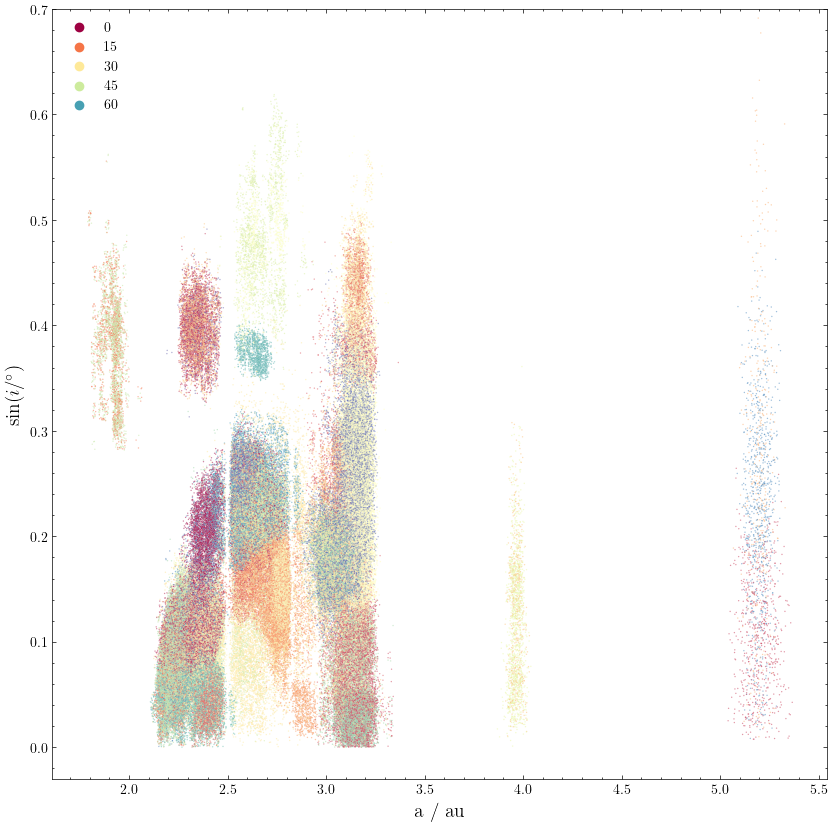

In [16]:
## rearrange the simulation dataset (df) so that data with the same 
## labels are grouped together - MEW
grouped = df.groupby(["labels"])

## filter simulation data so that only the labelled groups with small 
## std of "a" are analyzed -- think this might be quality control 
## so that only the most reliably identified labelled groups are used 
## here. Then print how many labelled groups there are - MEW
cleaned = grouped.filter(lambda x:x["a"].std() <= .1)
print(len(cleaned["labels"].unique()))

## create a figure - MEW
fig, ax = plt.subplots(figsize=(10,10))

'''ax.set_ylabel(r'$\sin$(i / $\degree$)')'''
#ax.set_title('Color visualised across the inner solar system')

## plot the cleaned and sorted simulation data, with different colors 
## corresponding to the different labels (perhaps?) - MEW
g = sns.scatterplot(
    data=cleaned,
    x="a",
    y="sini",
    palette="Spectral",
    hue=anom_gen.model.predict(scaler.transform(cleaned[subspace].to_numpy())),
    s=1,
    alpha=.5,
    ax=ax
)

## label the x and y axes and set the y limits - MEW
ax.set_ylabel(r"$\sin(i / ^\circ)$", fontsize=14)
ax.set_xlabel('a / au', fontsize=14)

ax.set_ylim(-.03, .7)

In [20]:
## again, rearrange the simulation dataset (df) so that data with 
## the same labels are grouped together - MEW
grouped = df.groupby(["labels"])
'''cleaned = grouped.filter(lambda x:x["a"].std() < .05) # Robust defintion here.
len(cleaned["labels"].unique())'''

## determine the means for each subspace column in each labelled group and convert to numpy array? - MEW
means = grouped.apply(lambda x:x[subspace].mean()).to_numpy()

## determine the (5x5) covariance matrix for each group and convert to numpy arrays? - MEW
covs = grouped.apply(lambda x:x[subspace].cov()).to_numpy().reshape(len(grouped), len(means[0]), len(means[0]))

## determine the standard deviations for each column in each labelled group by
## taking the sqrt of the diagonal elements of each covariance matrix - MEW
stds = np.sqrt([np.diagonal(cov) for cov in covs])

/tmp/ipykernel_292380/1244882280.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  means = grouped.apply(lambda x:x[subspace].mean()).to_numpy()
/tmp/ipykernel_292380/1244882280.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covs = grouped.apply(lambda x:x[subspace].cov()).to_numpy().reshape(len(grouped), len(means[0]), len(means[0]))


In [21]:
## display the mean a*, i-z, a, sini, and e values for labelled groups 
## where the mean of a is between 2.6 and 2.7 - MEW
grouped.apply(lambda x:x[subspace].mean())[(grouped.apply(lambda x:x[subspace].mean())["a"] < 2.7) & (grouped.apply(lambda x:x[subspace].mean())["a"] >= 2.6)]

/tmp/ipykernel_292380/2249638802.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x:x[subspace].mean())[(grouped.apply(lambda x:x[subspace].mean())["a"] < 2.7) & (grouped.apply(lambda x:x[subspace].mean())["a"] >= 2.6)]
/tmp/ipykernel_292380/2249638802.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x:x[subspace].mean())[(grouped.apply(lambda x:x[subspace].me

,a*,i-z,a,sini,e
labels,,,,,
1,-0.104035,-0.001589,2.635374,0.226530,0.153474
11,0.101350,-0.082771,2.617758,0.164431,0.115323
16,0.037911,-0.049010,2.621880,0.214685,0.279044
19,0.099172,-0.055349,2.684019,0.361811,0.241042
21,0.086254,-0.158955,2.601725,0.242394,0.139824
36,0.015258,-0.021366,2.675027,0.477564,0.308539
39,-0.094062,0.004272,2.617718,0.235818,0.142516
43,0.099343,-0.063831,2.644926,0.221208,0.166628
44,0.006785,-0.037207,2.675465,0.479649,0.164327
